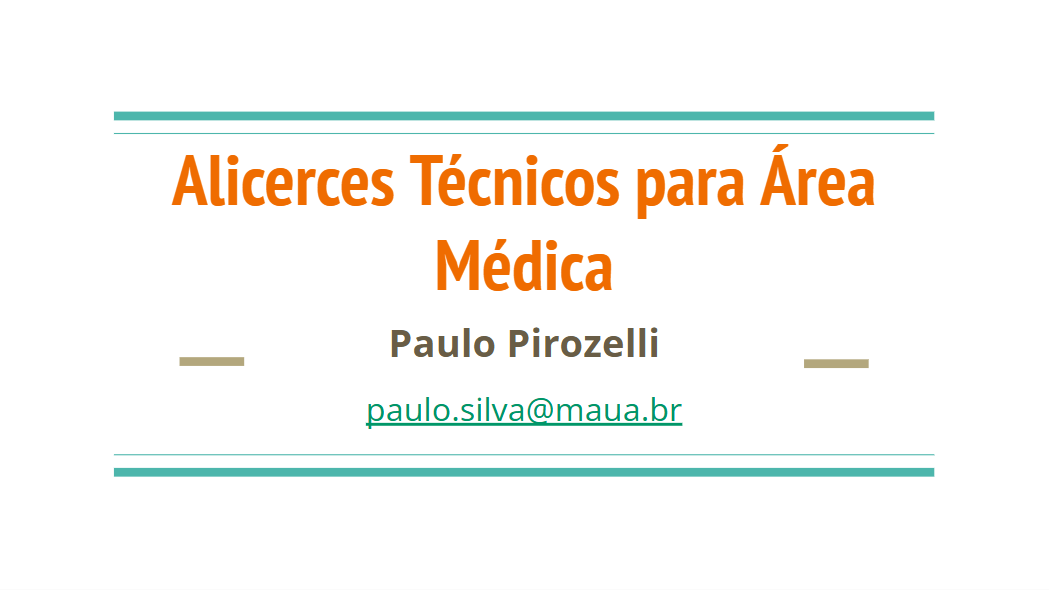

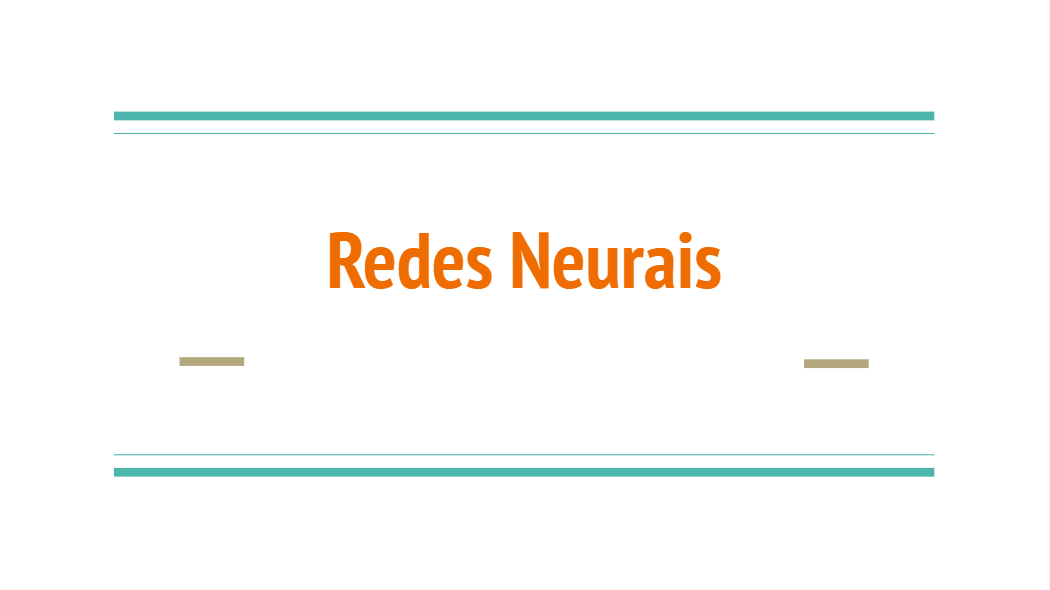

## Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, f1_score
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Introdução

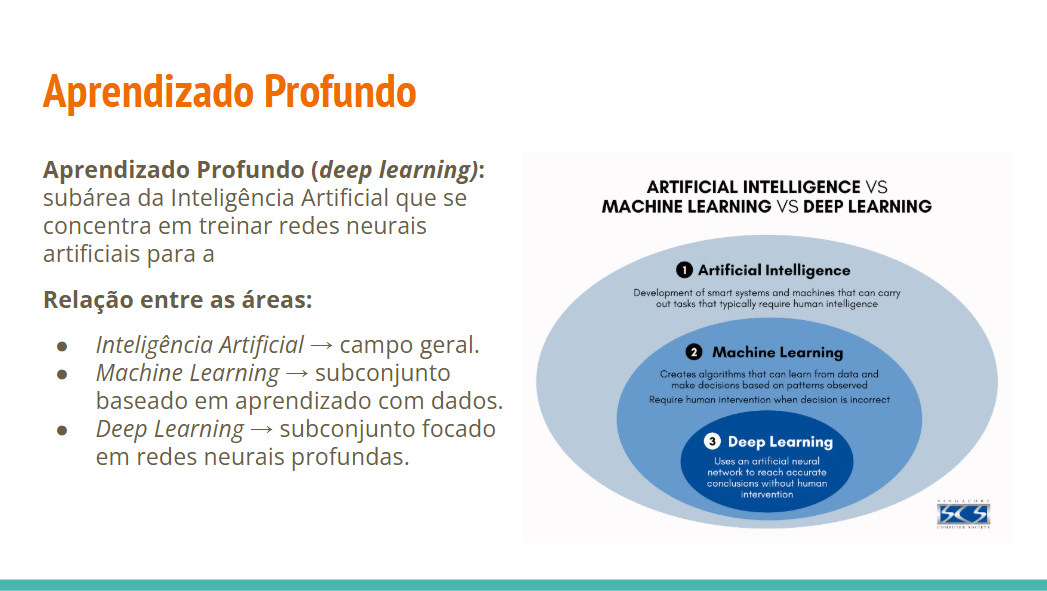

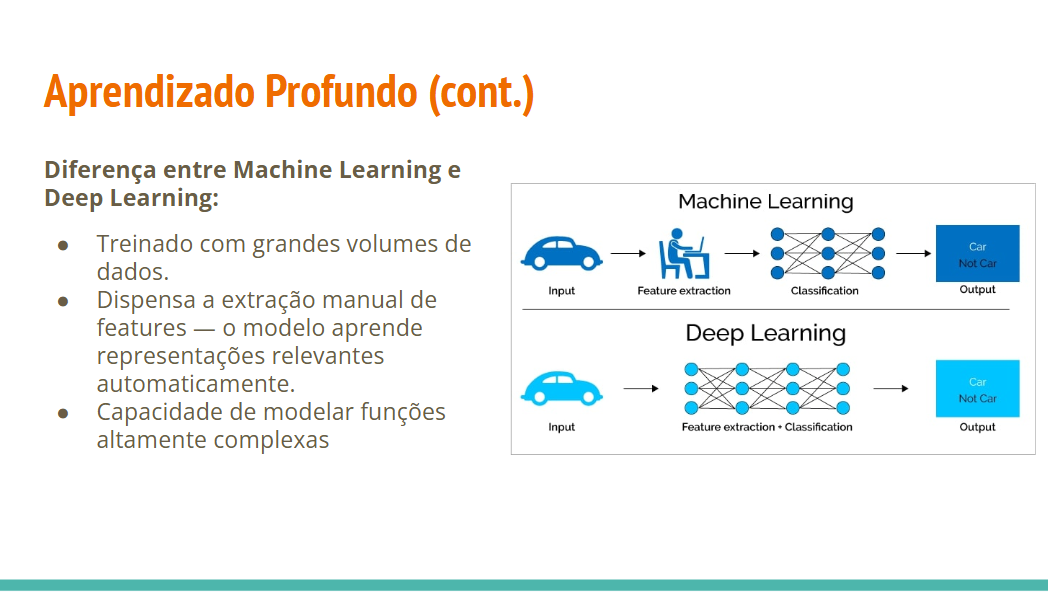

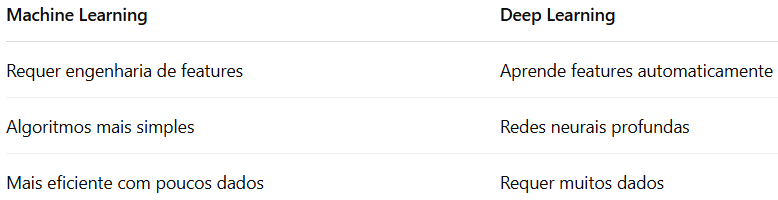

## Funções

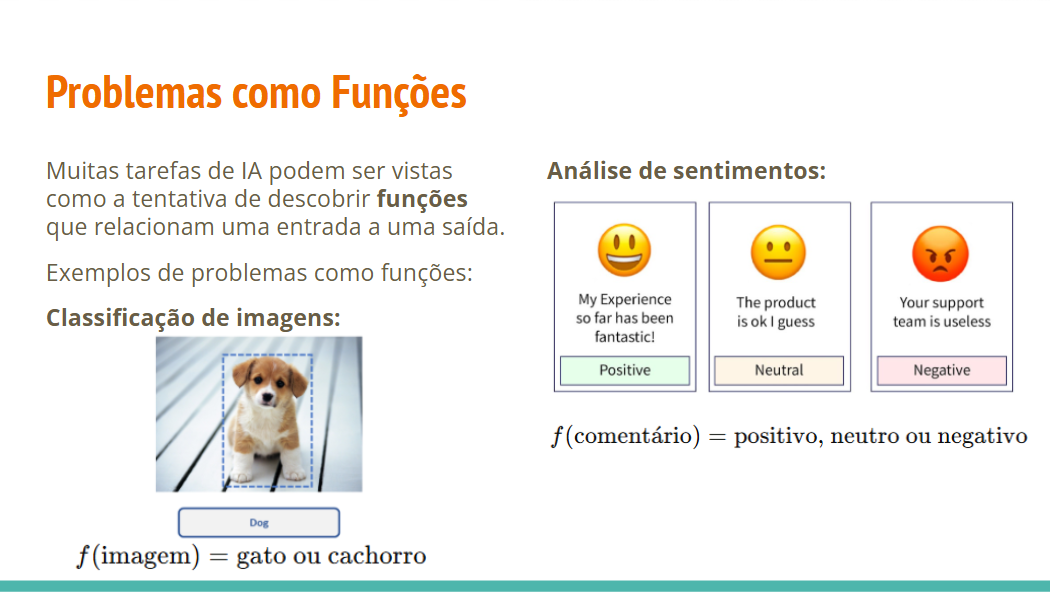

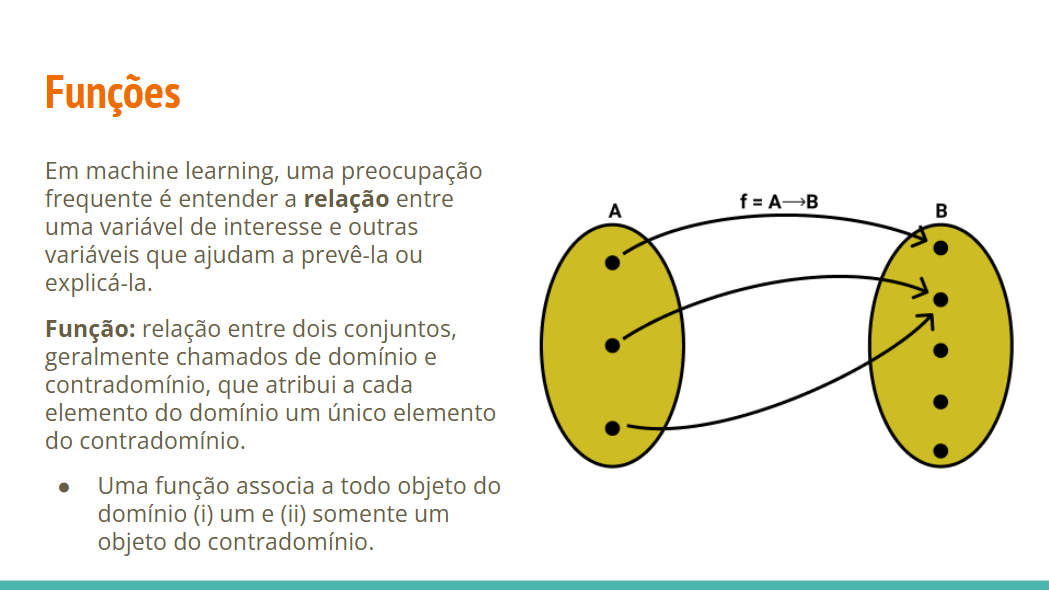

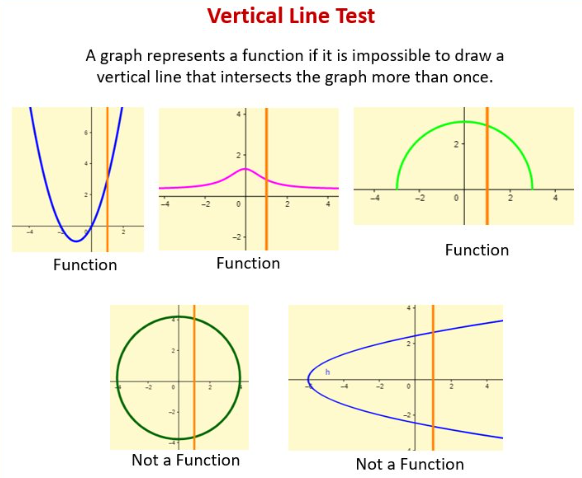

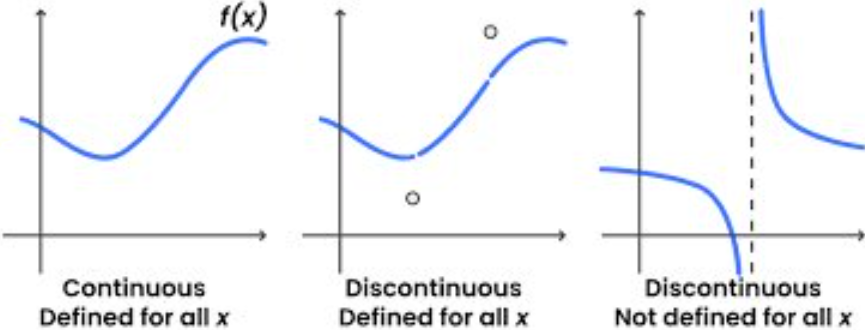

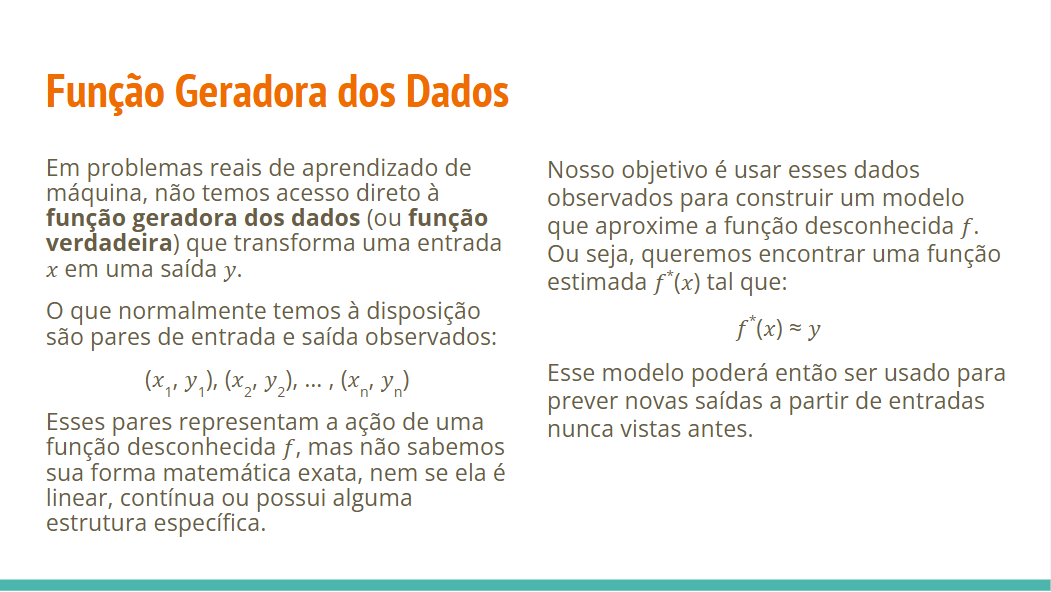

### Exemplo: Regressão Linear

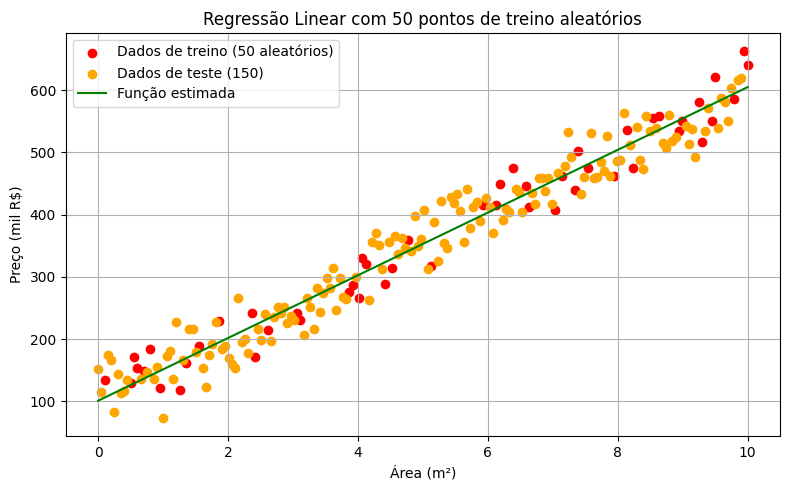

In [ ]:
# Parâmetros da função verdadeira
true_w, true_b = 50, 100

# Gerar 200 pontos com ruído
np.random.seed(0)
X_full = np.linspace(0, 10, 200).reshape(-1, 1)
noise_full = np.random.normal(0, 30, X_full.shape[0]).reshape(-1, 1)
y_full = true_w * X_full + true_b + noise_full  # y = 50x + 100 + ruído

# Selecionar 50 pontos aleatórios para treino
indices = np.random.choice(range(200), size=50, replace=False)
X_train_random = X_full[indices]
y_train_random = y_full[indices]

# Os restantes são dados de teste
mask = np.ones(200, dtype=bool)
mask[indices] = False
X_test_random = X_full[mask]
y_test_random = y_full[mask]

# Ajustar o modelo com dados de treino aleatórios
model_random = LinearRegression()
model_random.fit(X_train_random, y_train_random)
y_pred_random = model_random.predict(X_full)

# Coeficientes estimados
estimated_w_random = model_random.coef_[0][0]
estimated_b_random = model_random.intercept_[0]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_train_random, y_train_random, color="red", label="Dados de treino (50 aleatórios)")
plt.scatter(X_test_random, y_test_random, color="orange", label="Dados de teste (150)")
plt.plot(X_full, y_pred_random, color="green", label="Função estimada")
plt.title("Regressão Linear com 50 pontos de treino aleatórios")
plt.xlabel("Área (m²)")
plt.ylabel("Preço (mil R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

É preciso, porém, que a função que estamos utilizando para aproximar os dados seja tão expressiva quanto a função geradora dos dados. Quanto maior for essa diferença, pior será o ajuste.

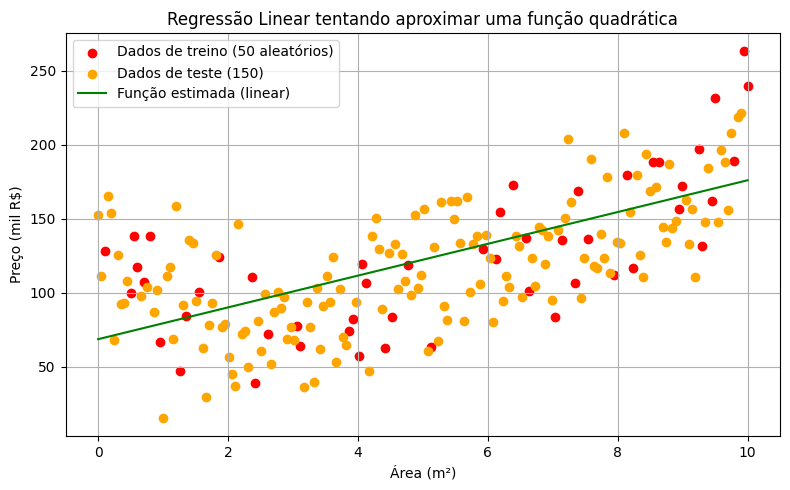

In [ ]:
# Definir novos parâmetros para uma função quadrática: y = ax^2 + bx + c
a, b, c = 2, -10, 100

# Gerar dados com 200 pontos e ruído
np.random.seed(0)
X_poly = np.linspace(0, 10, 200).reshape(-1, 1)
noise_poly = np.random.normal(0, 30, X_poly.shape[0]).reshape(-1, 1)
y_poly = a * X_poly**2 + b * X_poly + c + noise_poly

# Selecionar 50 pontos aleatórios para treino
indices_poly = np.random.choice(range(200), size=50, replace=False)
X_train_poly = X_poly[indices_poly]
y_train_poly = y_poly[indices_poly]

# Preparar dados com features polinomiais de grau 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_feat = poly_features.fit_transform(X_train_poly)
X_poly_feat = poly_features.transform(X_poly)

# Ajustar modelo de regressão linear (sem transformação polinomial)
model_linear_on_poly = LinearRegression()
model_linear_on_poly.fit(X_train_poly, y_train_poly)
y_pred_linear_on_poly = model_linear_on_poly.predict(X_poly)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_train_poly, y_train_poly, color="red", label="Dados de treino (50 aleatórios)")
plt.scatter(X_poly[~np.isin(range(200), indices_poly)], y_poly[~np.isin(range(200), indices_poly)],
            color="orange", label="Dados de teste (150)")
plt.plot(X_poly, y_pred_linear_on_poly, color="green", label="Função estimada (linear)")
plt.title("Regressão Linear tentando aproximar uma função quadrática")
plt.xlabel("Área (m²)")
plt.ylabel("Preço (mil R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

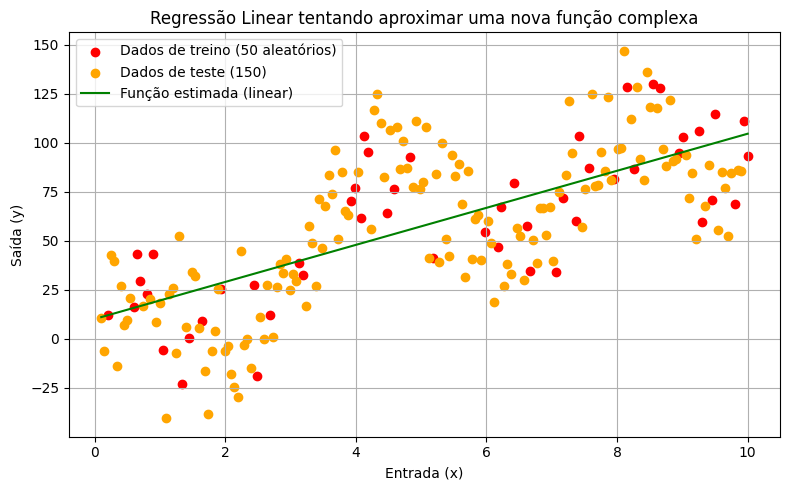

In [ ]:
# Função que combina cosseno, raiz quadrada e logaritmo
np.random.seed(0)
X_complex2 = np.linspace(0.1, 10, 200).reshape(-1, 1)  # começa em 0.1 para evitar log(0)
noise_complex2 = np.random.normal(0, 20, X_complex2.shape[0]).reshape(-1, 1)
y_complex2 = 30 * np.cos(1.5 * X_complex2) + 10 * np.sqrt(X_complex2) + 25 * np.log(X_complex2) + noise_complex2

# Selecionar 50 pontos aleatórios para treino
indices_complex2 = np.random.choice(range(200), size=50, replace=False)
X_train_complex2 = X_complex2[indices_complex2]
y_train_complex2 = y_complex2[indices_complex2]

# Ajustar modelo linear
model_linear_complex2 = LinearRegression()
model_linear_complex2.fit(X_train_complex2, y_train_complex2)
y_pred_linear_complex2 = model_linear_complex2.predict(X_complex2)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_train_complex2, y_train_complex2, color="red", label="Dados de treino (50 aleatórios)")
plt.scatter(X_complex2[~np.isin(range(200), indices_complex2)], y_complex2[~np.isin(range(200), indices_complex2)],
            color="orange", label="Dados de teste (150)")
plt.plot(X_complex2, y_pred_linear_complex2, color="green", label="Função estimada (linear)")
plt.title("Regressão Linear tentando aproximar uma nova função complexa")
plt.xlabel("Entrada (x)")
plt.ylabel("Saída (y)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Classificação

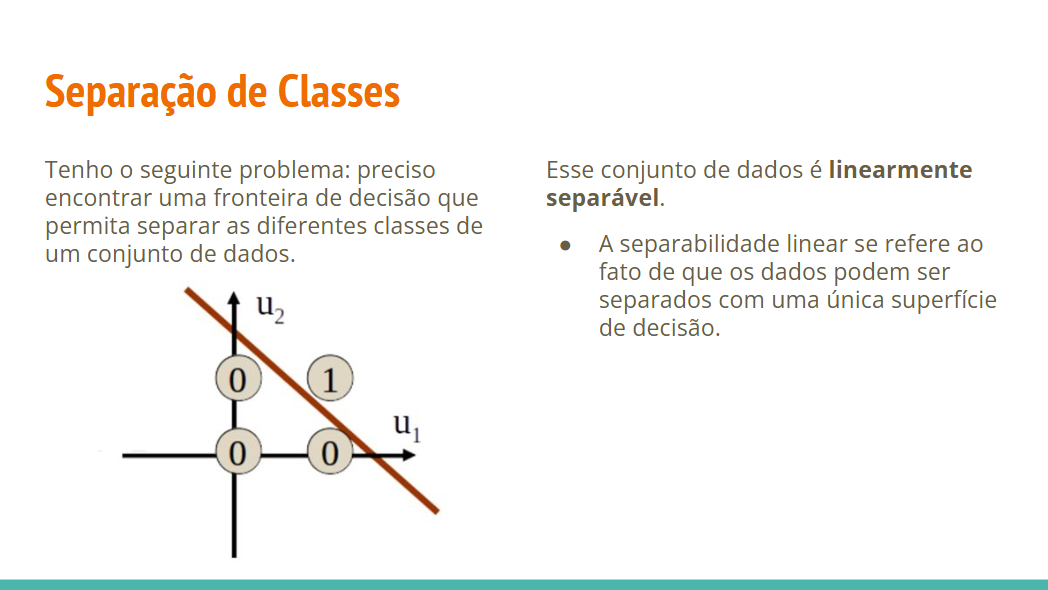

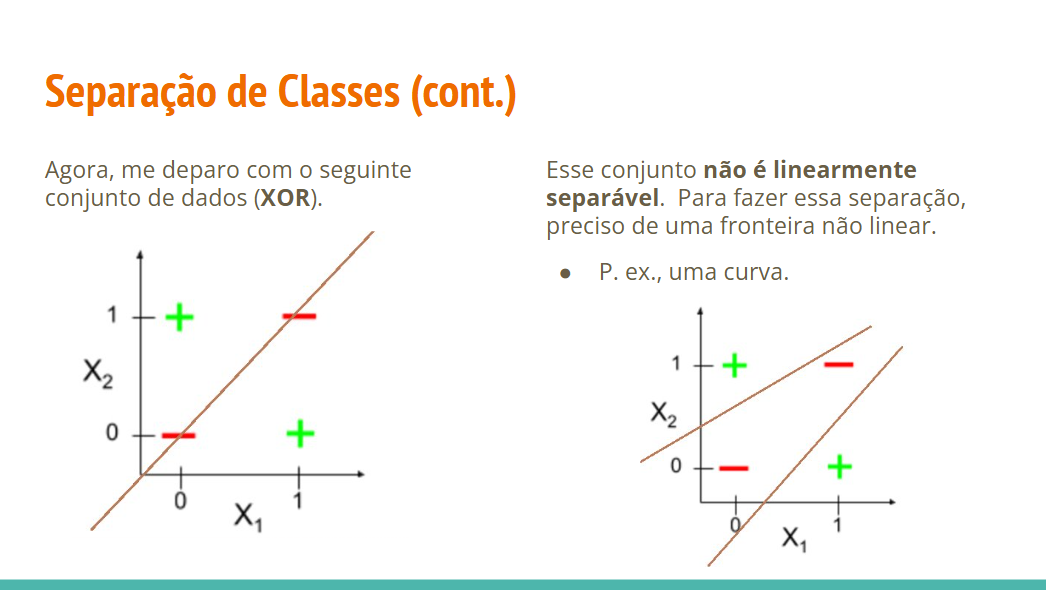

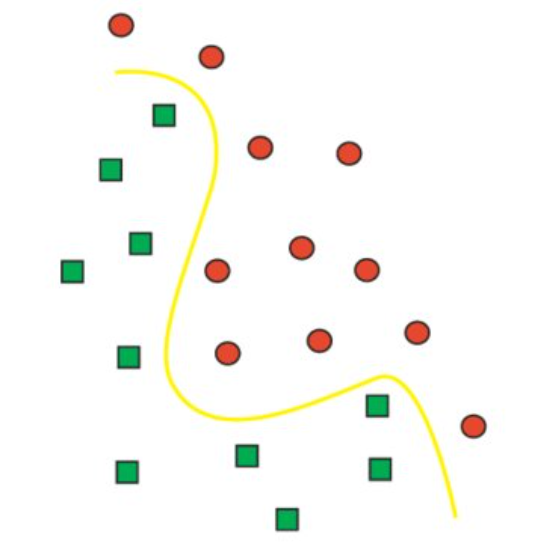

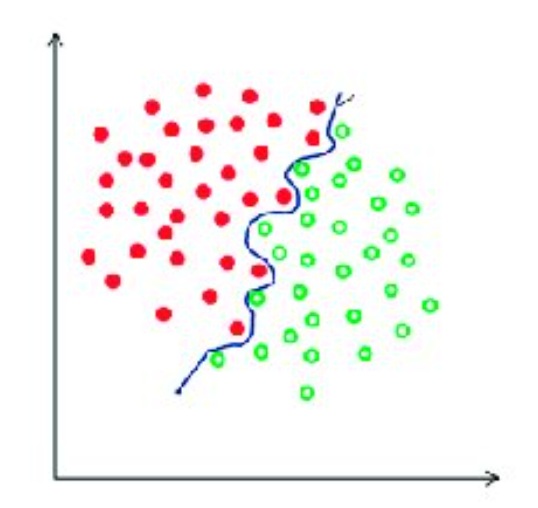

## Redes Neurais

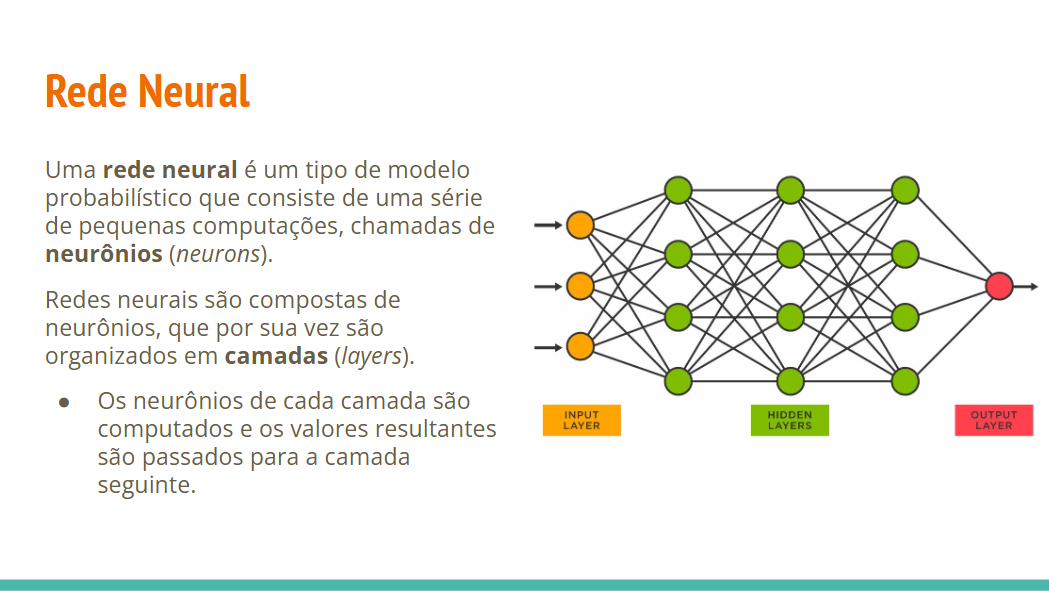

### Neurônios

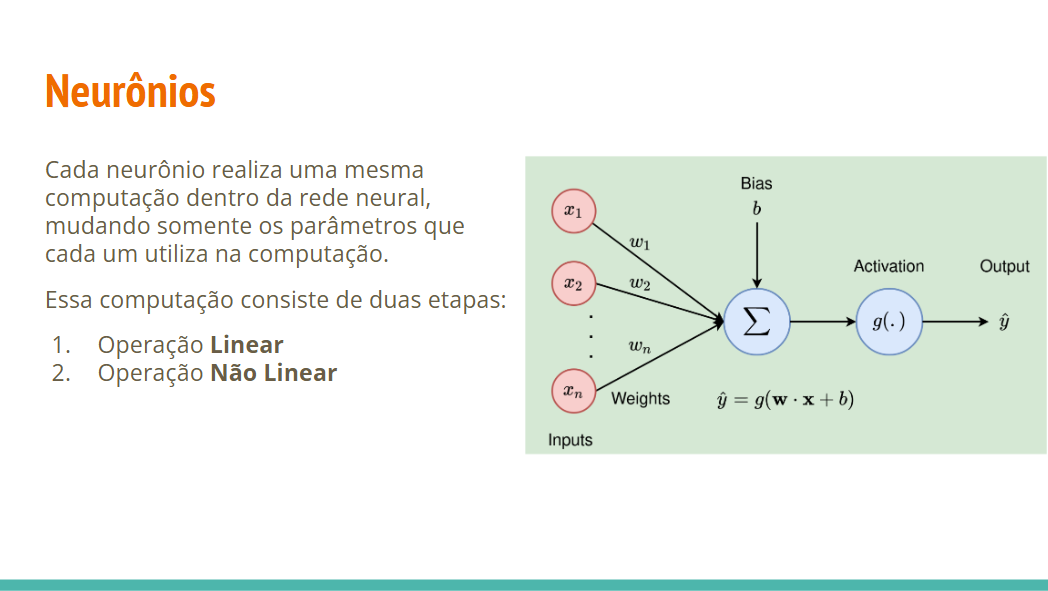

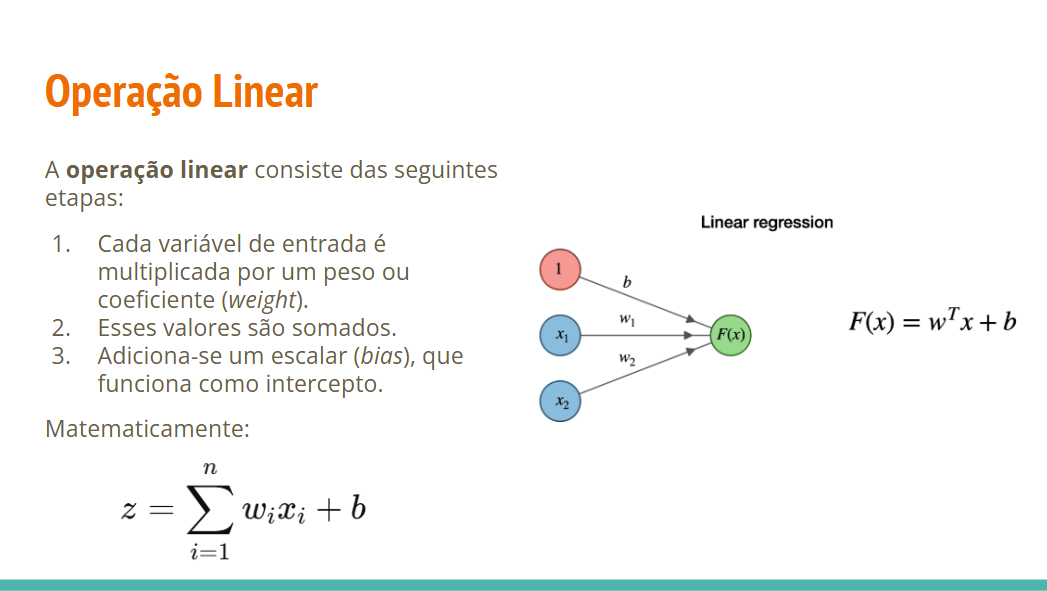

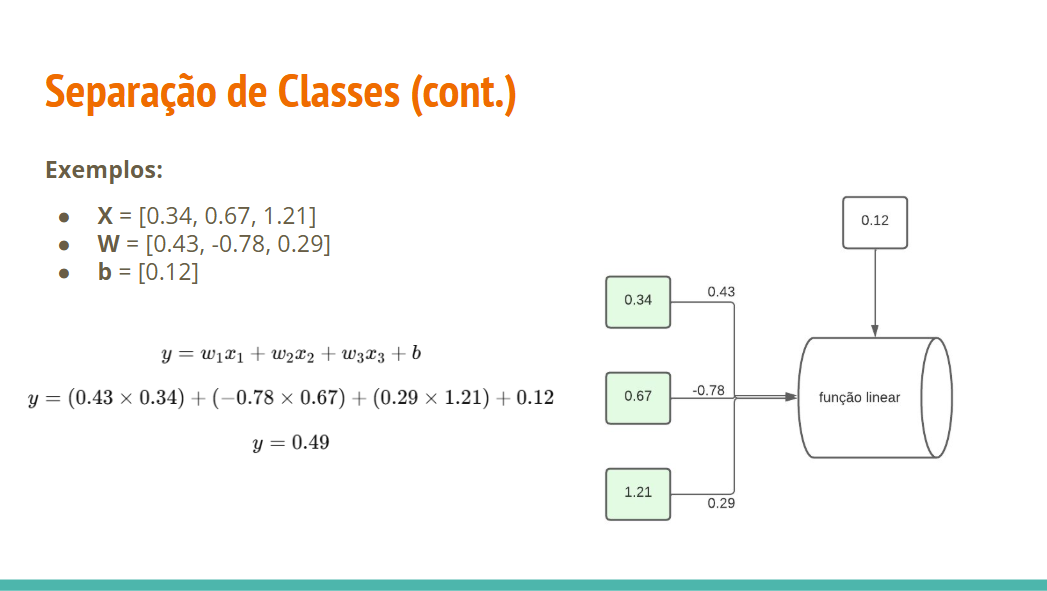

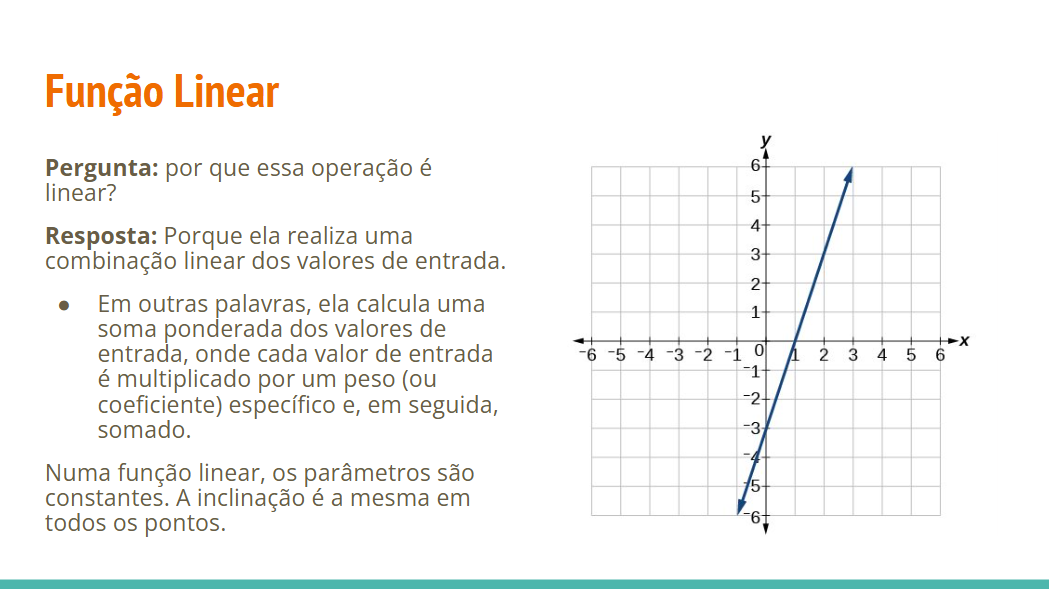

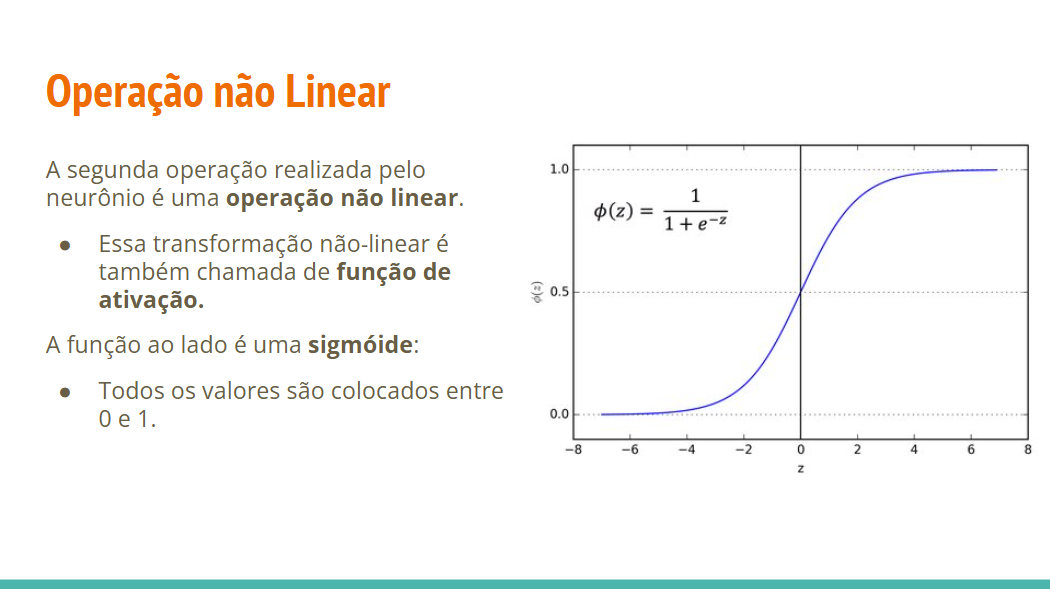

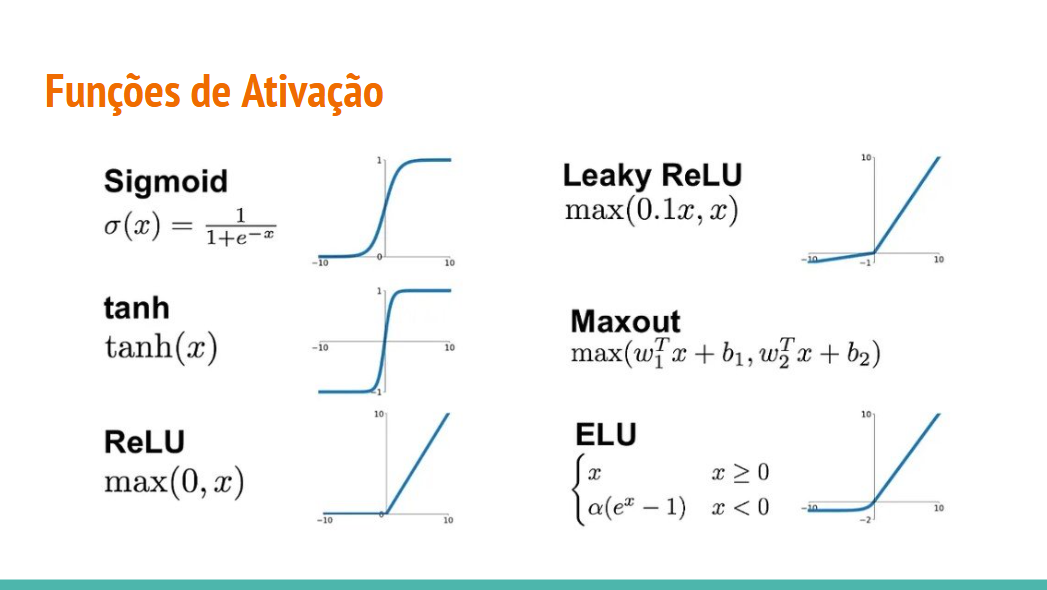

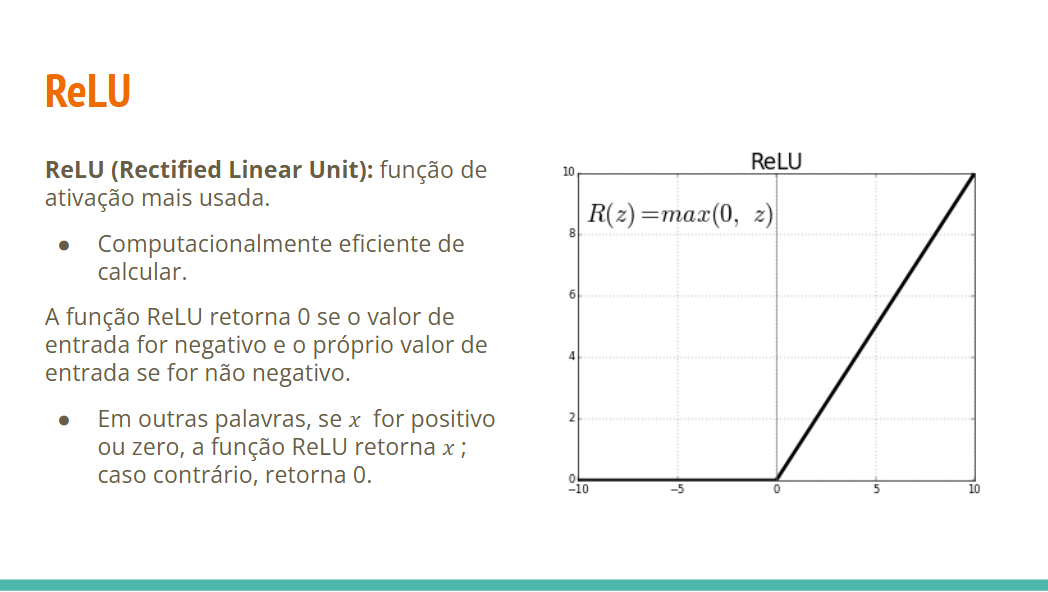

### Teorema da Aproximação Universal

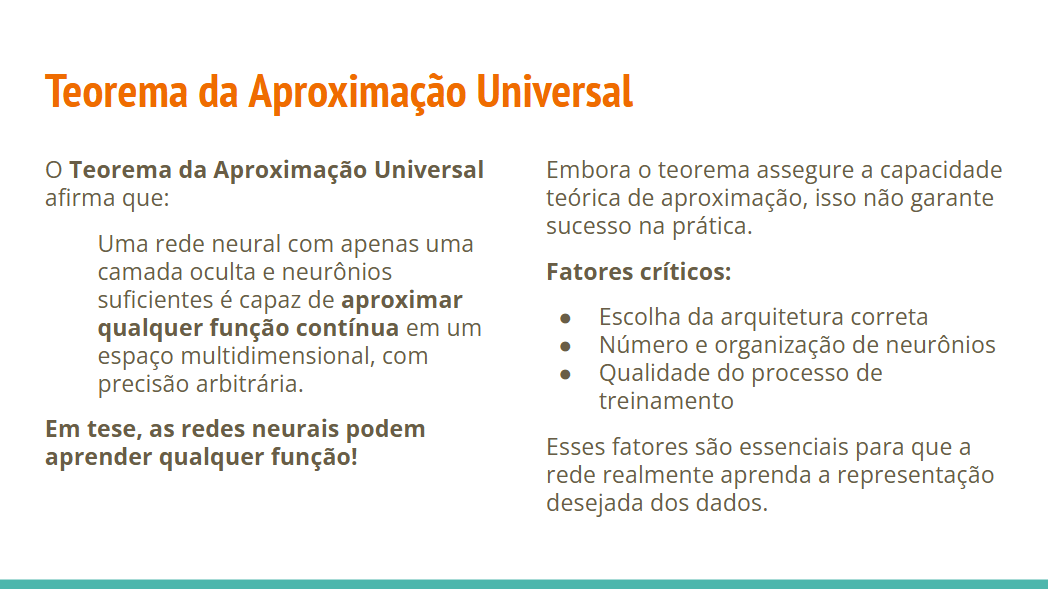

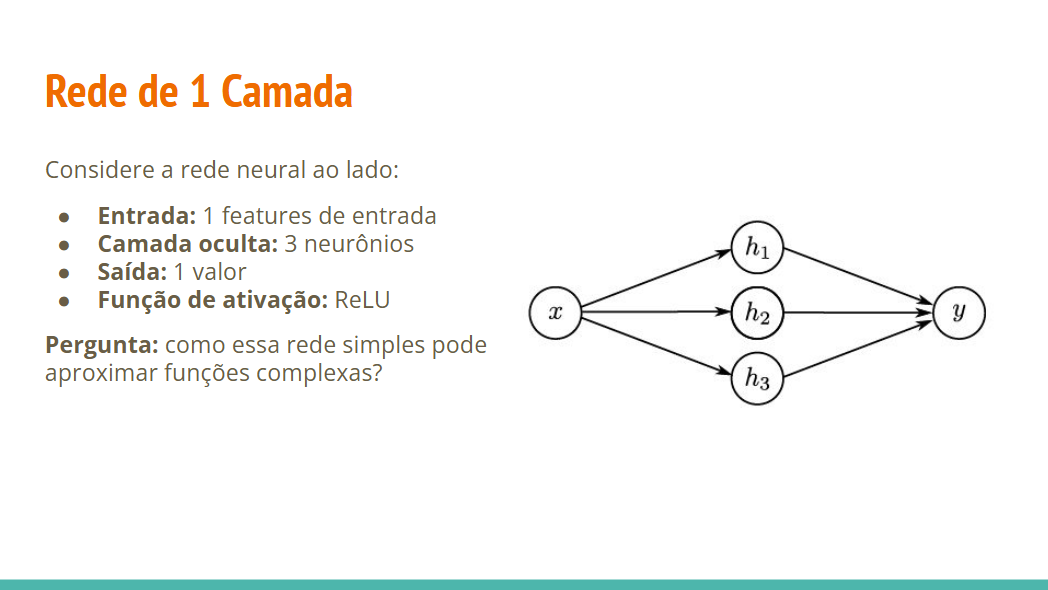

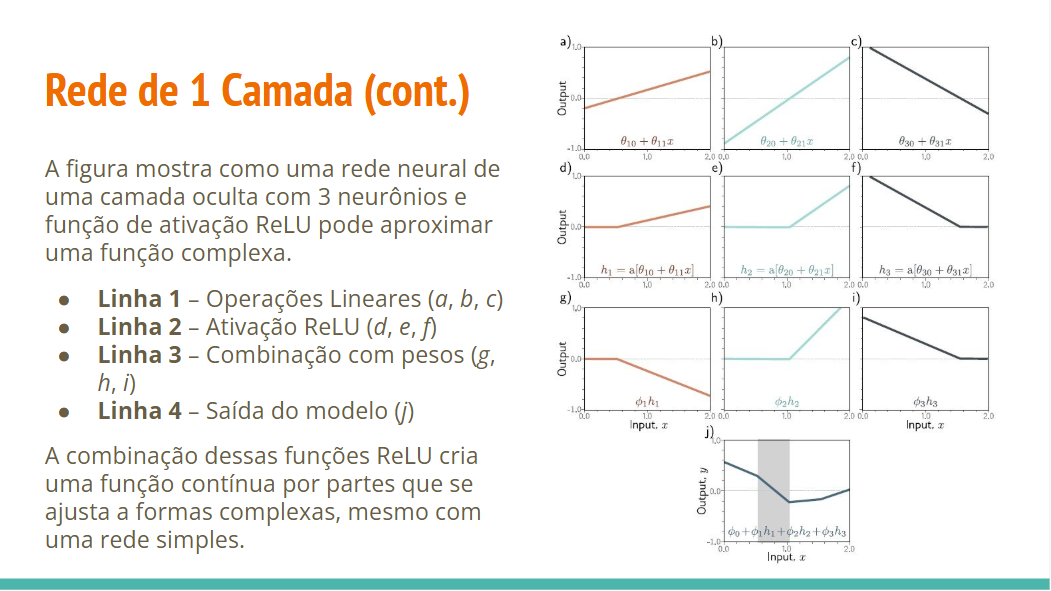

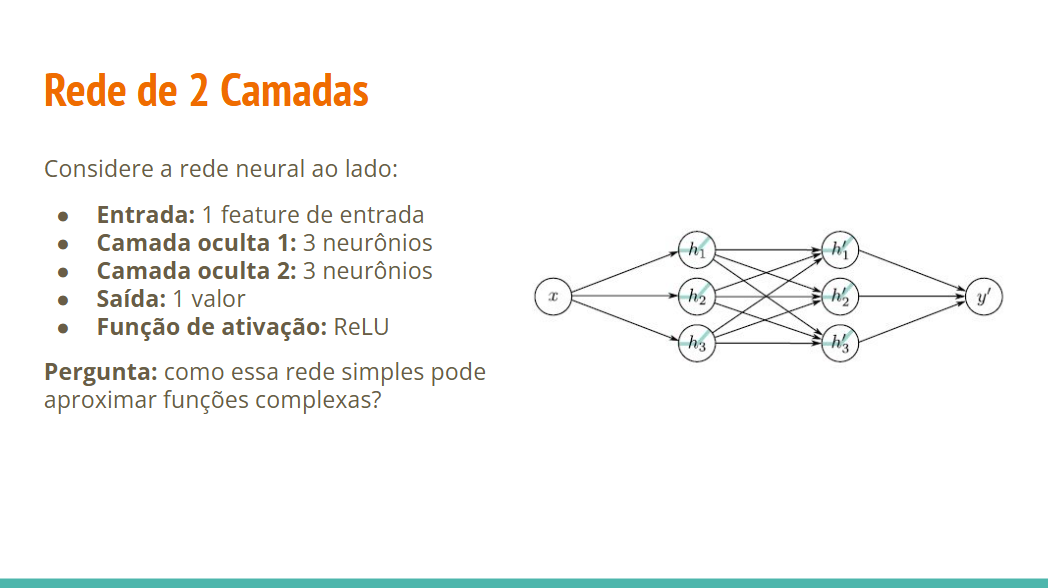

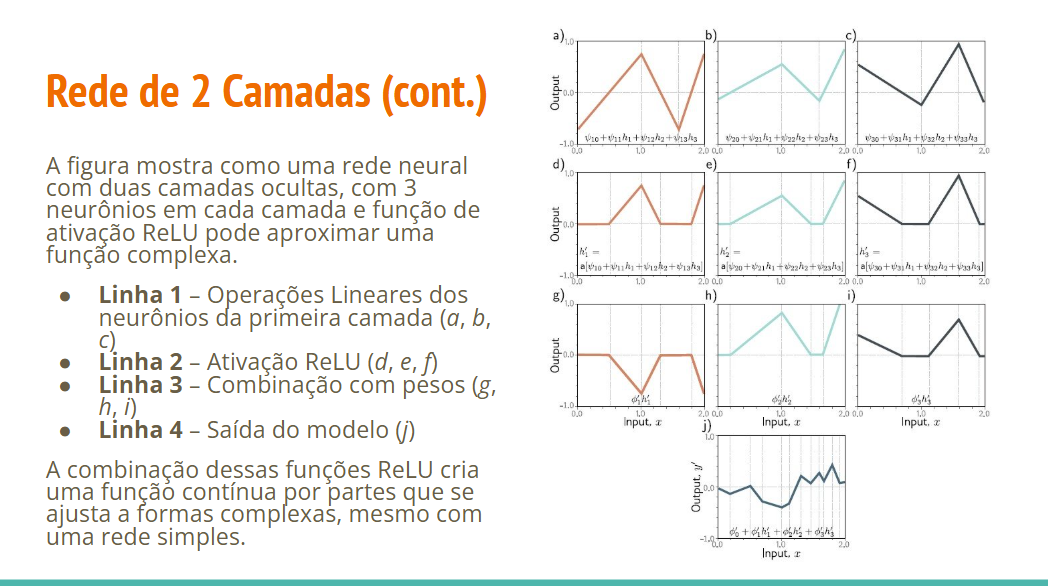

### Classificação

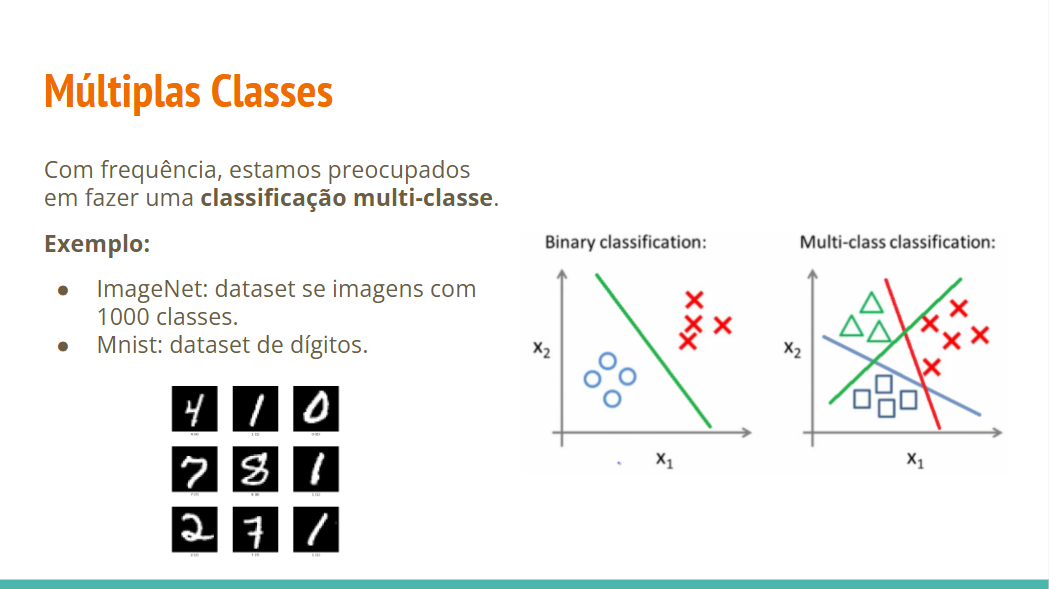

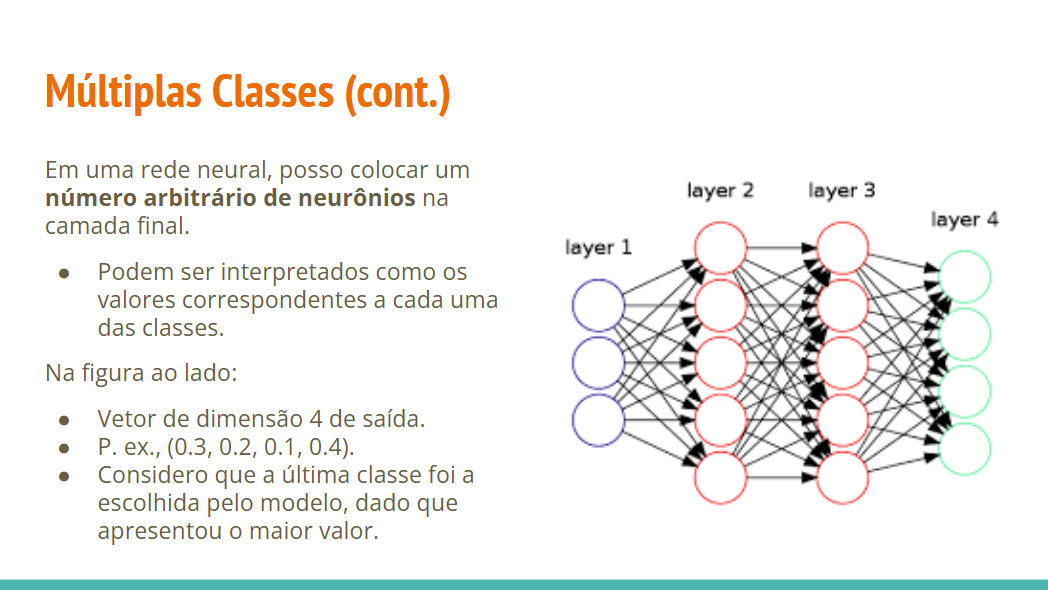

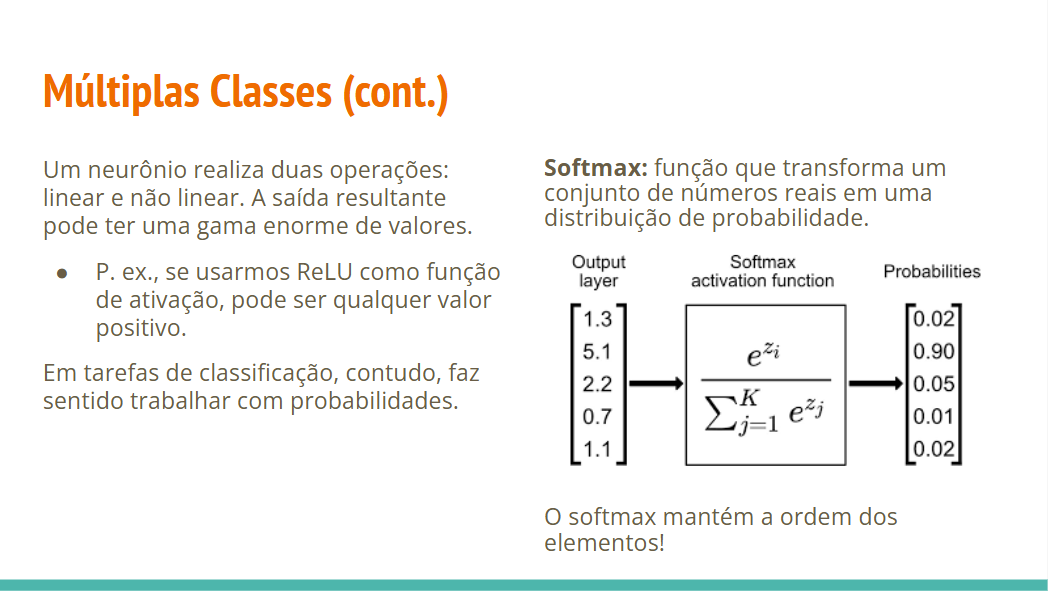

## Treinamento

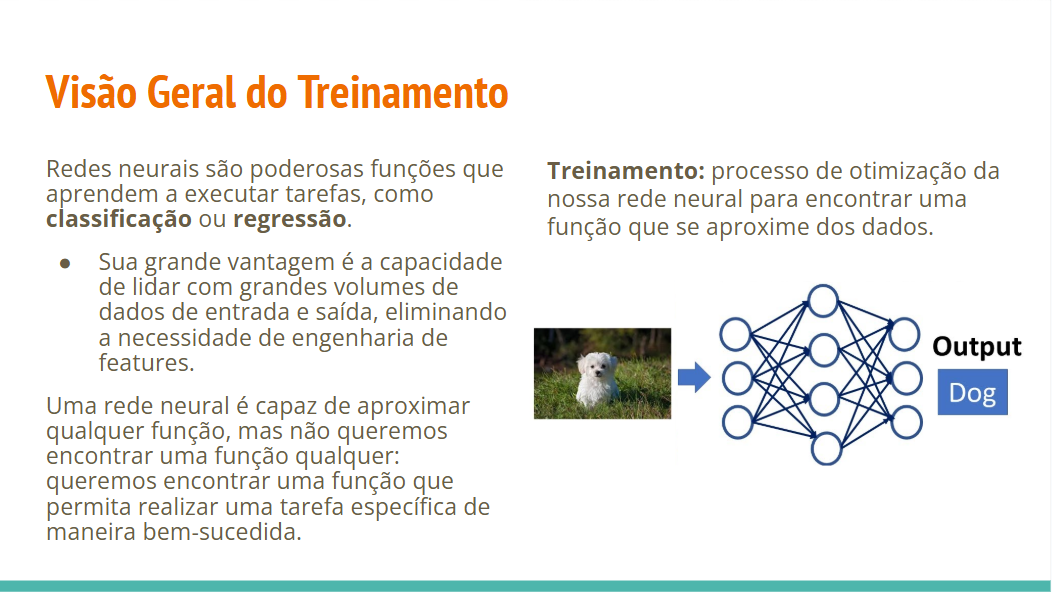

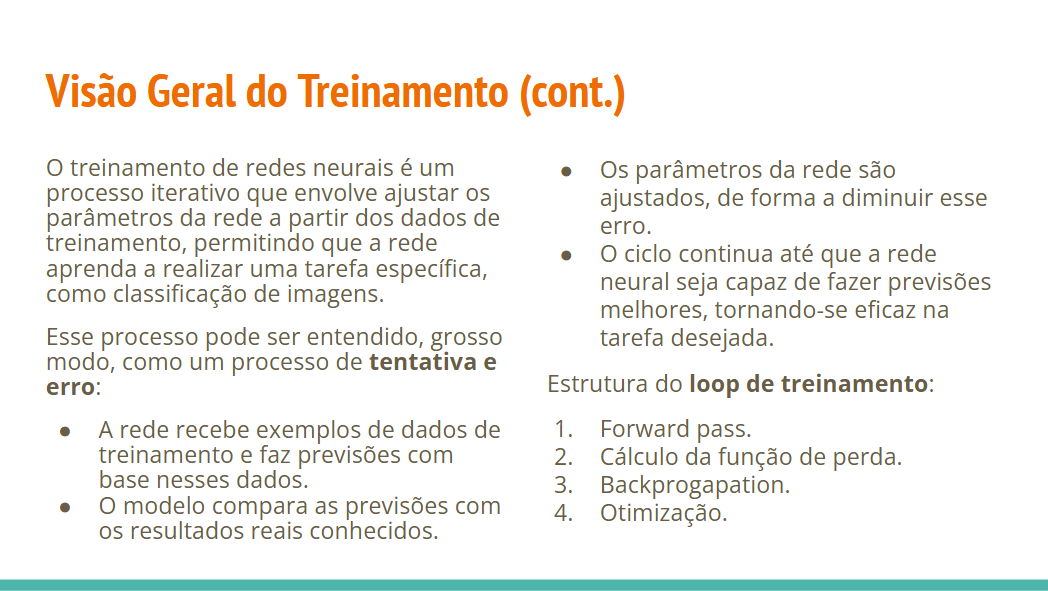

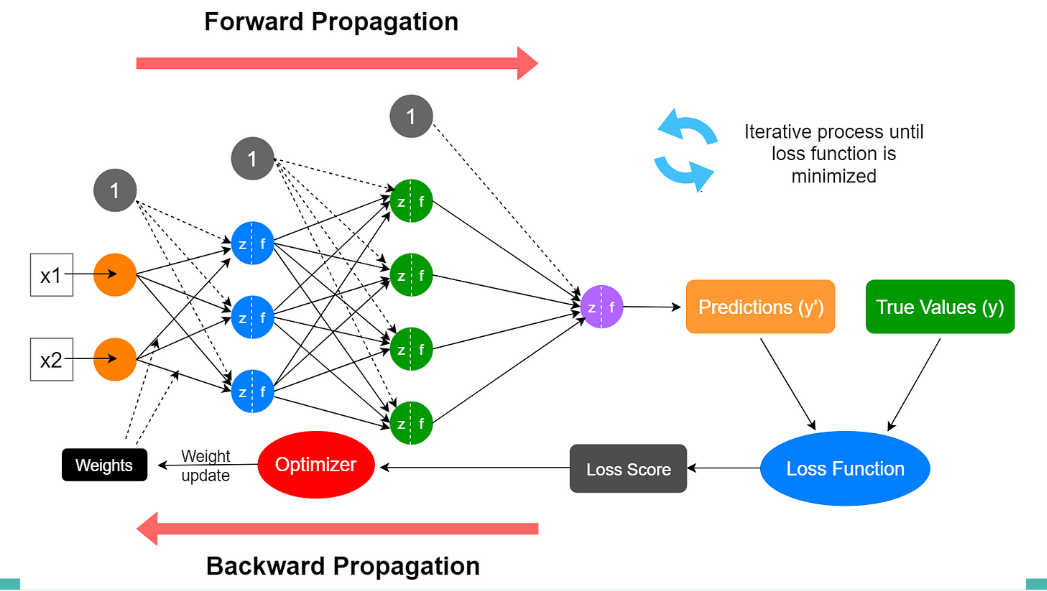

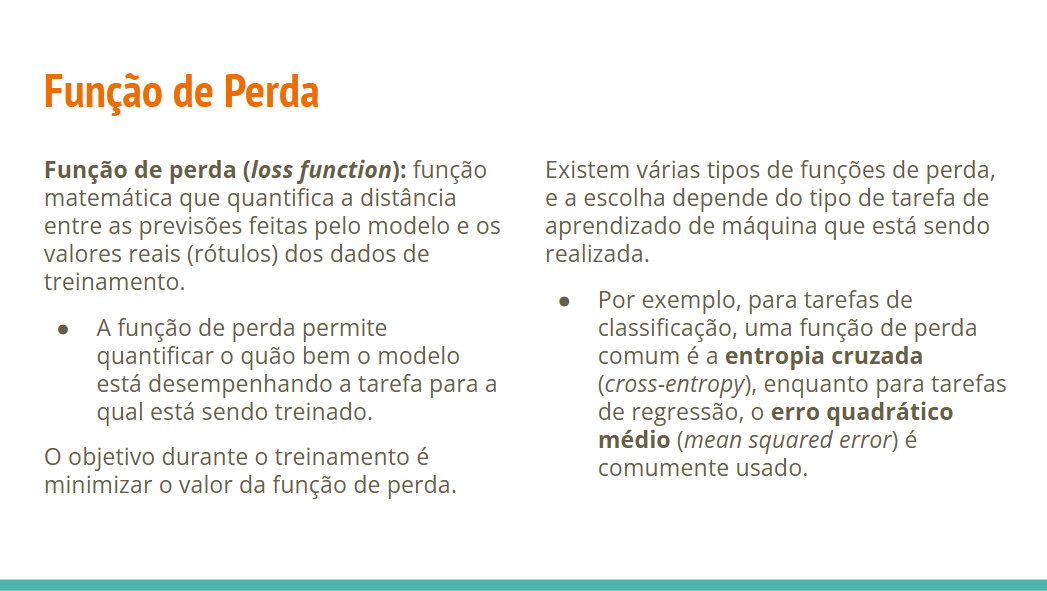

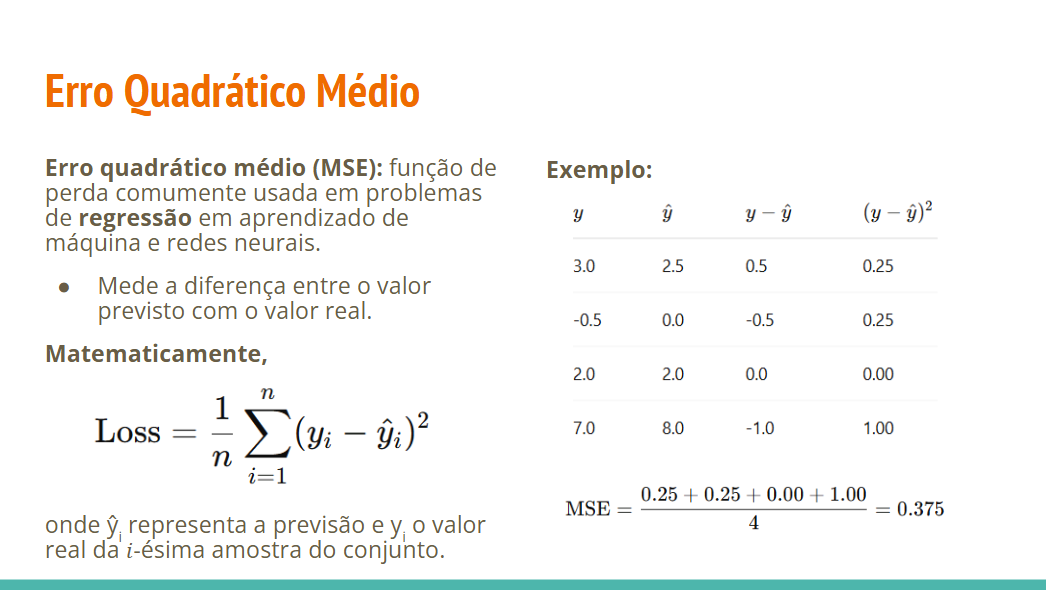

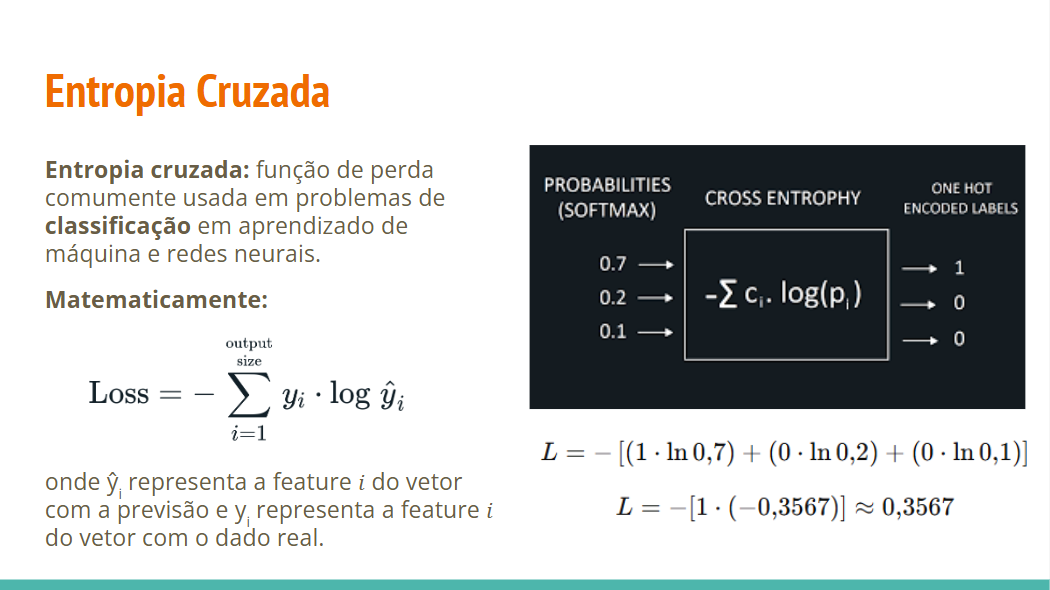

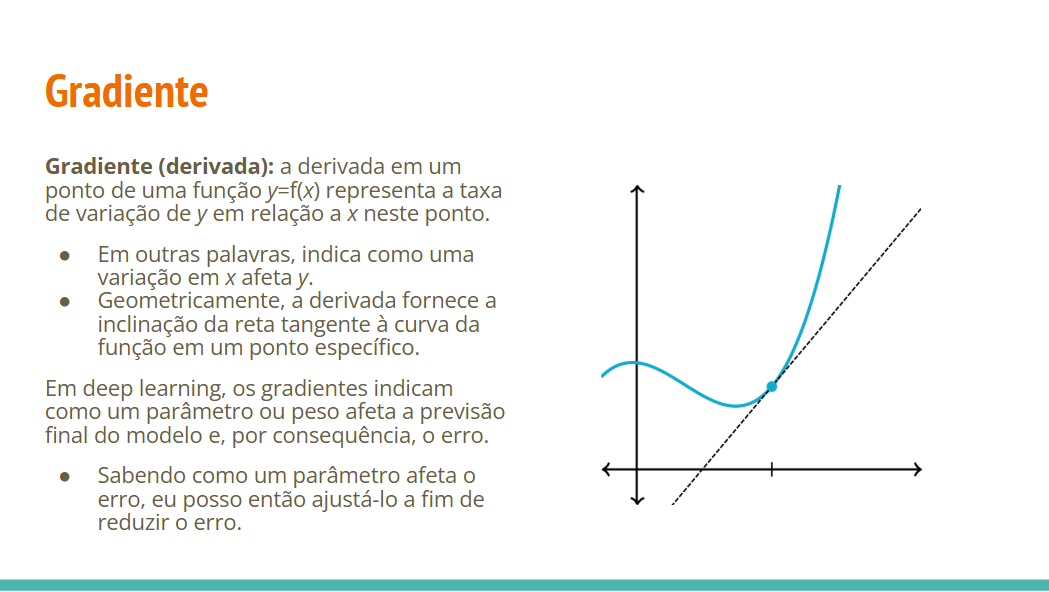

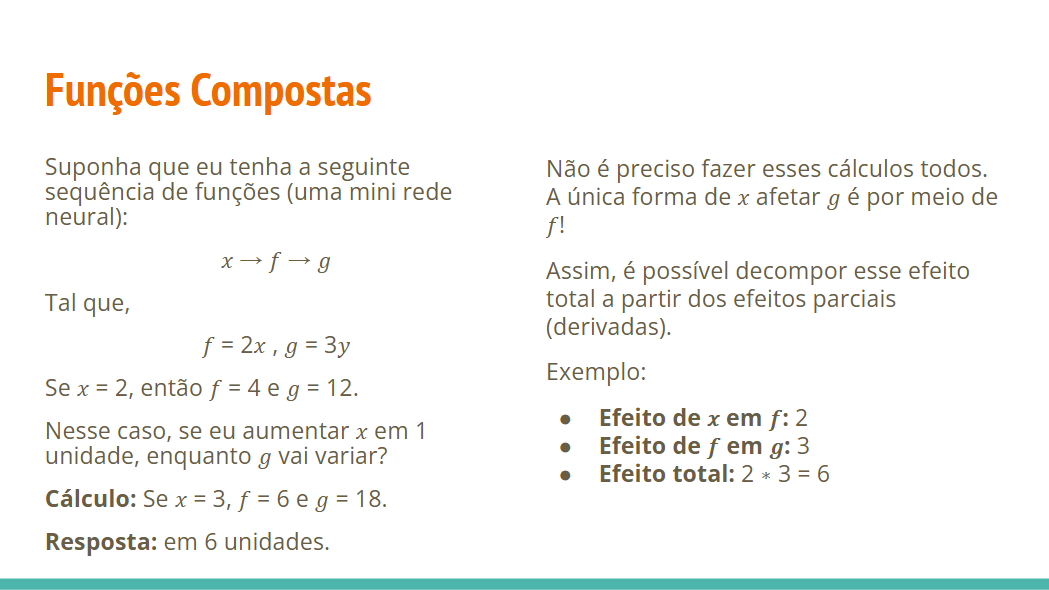

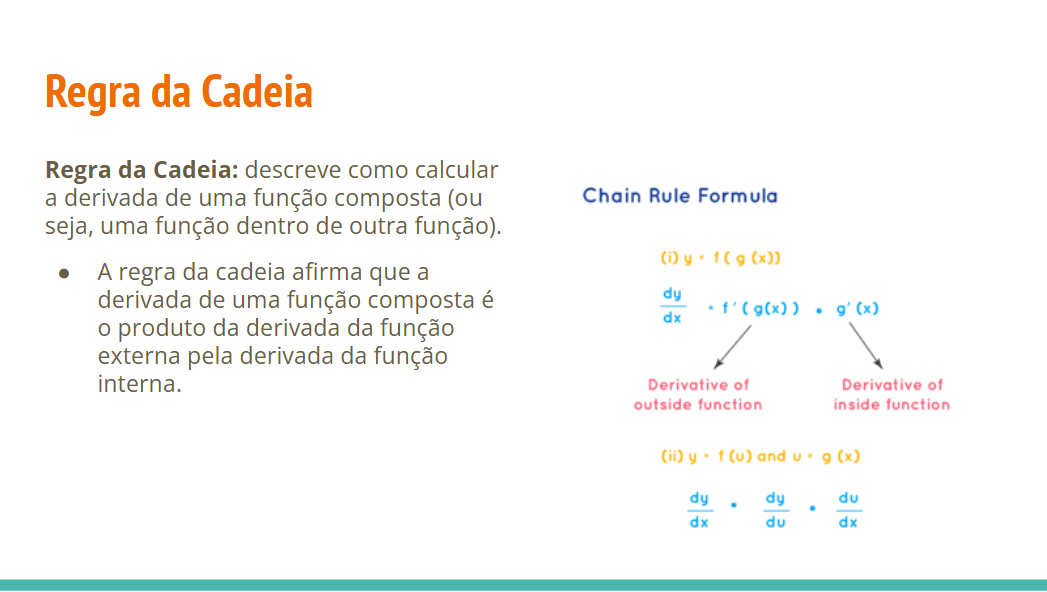

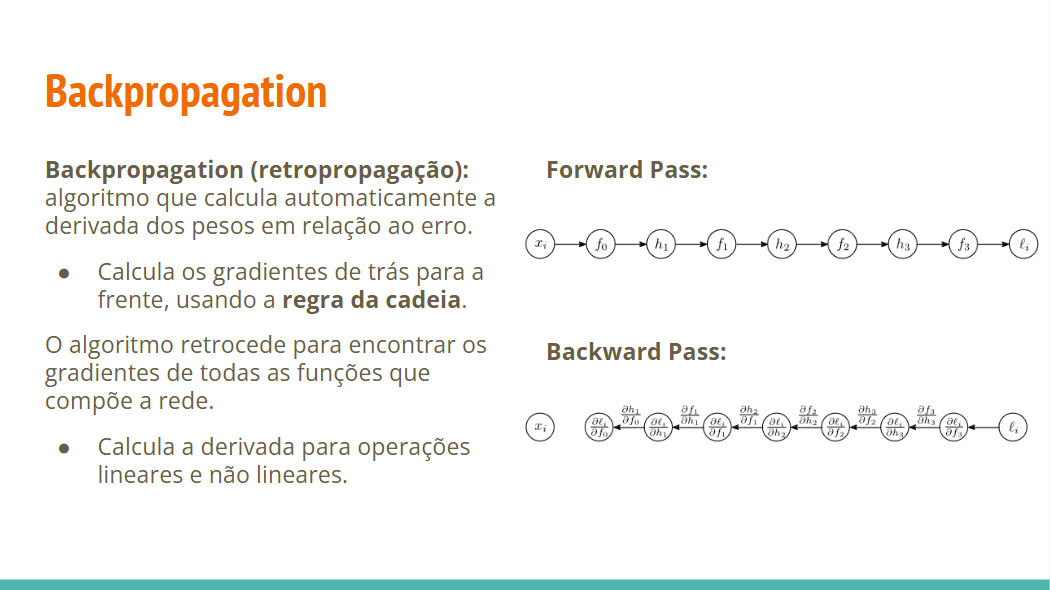

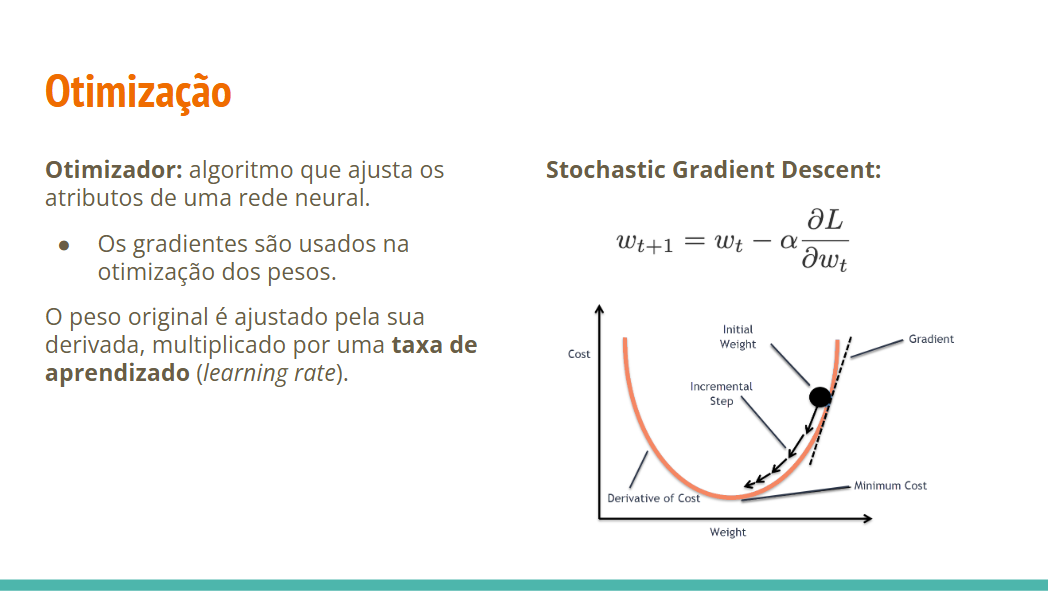

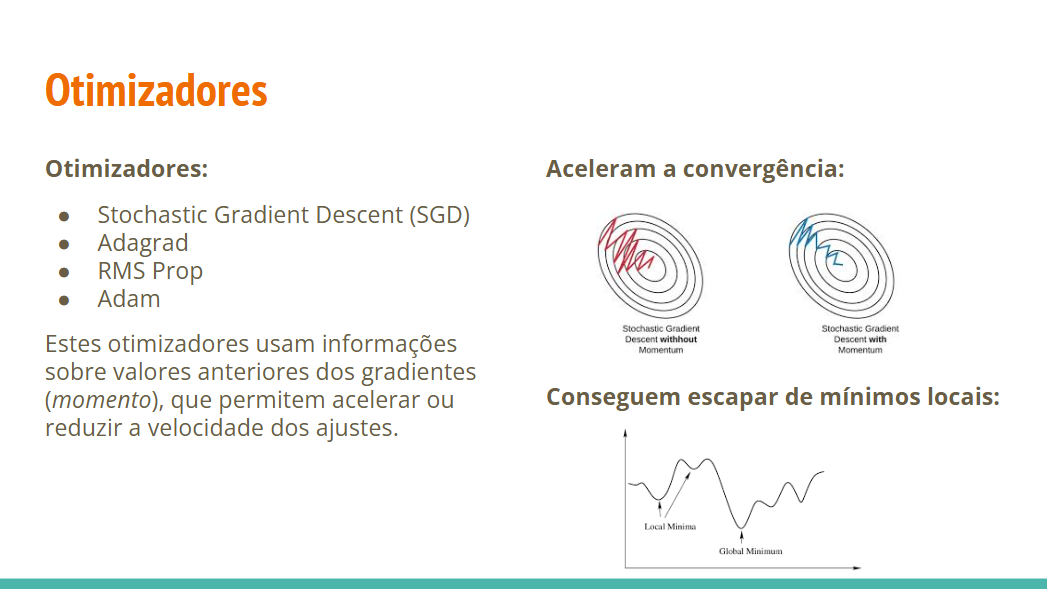

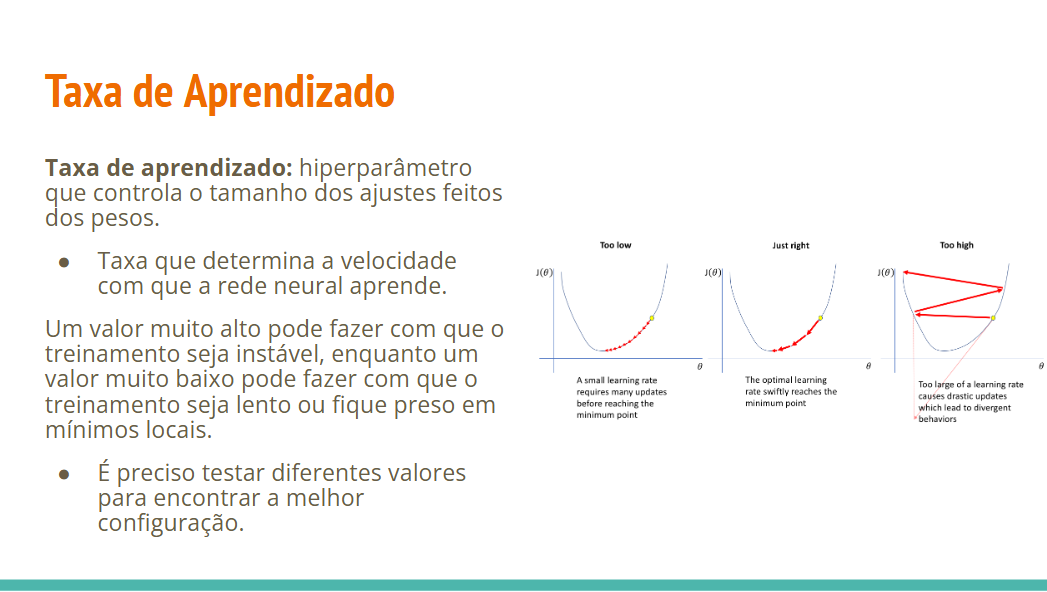

A **rede neural** é mais um modelo de aprendizado de máquina. Assim como nos outros casos, seguimos o mesmo pipeline básico, composto pelas seguintes etapas:

1. Pré-processamento dos dados

2. Separação dos dados entre treino e teste (e validação)

3. Treinamento do modelo

4. Avaliação do desempenho

5. (Opcional) Ajuste de hiperparâmetros e melhorias

**Importante:** Em redes neurais, a **função de perda** é usada para ajustar os pesos do modelo durante o treinamento, enquanto a **métrica** serve apenas para avaliar o desempenho, sem influenciar a atualização dos pesos.

* Em problemas de **regressão**, como prevemos valores contínuos, geralmente usamos o **Erro Quadrático Médio** tanto como função de perda quanto como métrica, o que faz essa diferença passar despercebida.

* Já em problemas de **classificação**, usamos a **entropia cruzada** como função de perda, pois ela mede a distância entre distribuições de probabilidade. Para a avaliação, no entanto, preferimos a **acurácia**, que é mais intuitiva: ela indica a proporção de exemplos classificados corretamente. Quando as classes estão desbalanceadas, também podemos utilizar métricas como precisão, revocação e F1-score.

Em resumo, a função de perda é usada para otimizar o modelo, enquanto a métrica é usada para avaliar o seu desempenho.


## Aplicação

Vamos trabalhar com uma tarefa de **regressão**. Utilizaremos o dataset **California Housing Dataset**.

Este dataset é baseado no censo de 1990 da Califórnia, nos EUA. O objetivo é prever o valor médio das casas em distritos com base em variáveis socioeconômicas.

**Features** (entrada):

* `MedInc`: Renda média dos moradores

* `HouseAge`: Idade média das casas

* `AveRooms`: Número médio de cômodos por casa

* `AveBedrms`: Número médio de quartos por casa

* `Population`: População total do distrito

* `AveOccup`: Número médio de ocupantes por casa

* `Latitude`: Latitude geográfica

* `Longitude`: Longitude geográfica

**Target** (saída):

* `MedHouseVal`: Valor médio das casas no distrito (em centenas de milhares de dólares)

Podemos usar o próprio sklearn para obter os dados.

In [ ]:
# Carregar o dataset
data = fetch_california_housing()
X, y = data.data, data.target

print(f'Dimensionalidade: {X.shape}')
print(X)

Dimensionalidade: (20640, 8)
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


Em seguida, dividimos o dataset em treino e teste.

In [ ]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Normalizamos os dados.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Treinamos dois modelos tradicionais para a nossa tarefa: **Regressão Linear** e **k-NN**.

In [ ]:
# Regressão linear
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

In [ ]:
# k-NN
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

Definimos uma métrica de avaliação, o **erro quadrático médio**, e calculamos os resultados para os dois modelos.

In [ ]:
# Métricas de teste
mse_lr = mean_squared_error(y_test, lr_pred) # Regressão linear
mse_knn = mean_squared_error(y_test, knn_pred) # k-NN

print(f"MSE Regressão Linear: {mse_lr:.4f}")
print(f"MSE k-NN: {mse_knn:.4f}")

MSE Regressão Linear: 0.5559
MSE k-NN: 0.4474


### Rede Neural

No caso da rede neural, precisamos decidir a arquitetura que queremos usar, isto é, o número de camadas, neurônios, função de ativação, etc.

Por exemplo, podemos construir uma rede neural com três camadas:

* **Camada 1:** 64 neurônios, função de ativação relu
* **Camada 2:** 32 neurônios, função de ativação relu
* **Camada 3:** 1 neurônio (previsão), sem função de ativação.

In [ ]:
# Rede Neural Densa com Keras
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precisamos também decidir o otimizador que queremos usar e uma função de perda.

In [ ]:
nn_model.compile(optimizer='adam', loss='mse')

Podemos agora treinar o modelo.

In [ ]:
# Treinar modelo e armazenar o histórico
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=1024,
    verbose=1,
    validation_split=0.1
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.4834 - val_loss: 0.8841
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.8816 - val_loss: 0.6736
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.6011 - val_loss: 0.5273
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.4803 - val_loss: 0.4448
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.4055 - val_loss: 0.4214
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.3902 - val_loss: 0.4084
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 0.3632 - val_loss: 0.3992
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.3576 - val_loss: 0.3882
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.3375 - val_loss: 0.3840
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.3423 - val_loss: 0.3775
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.3343 - val_loss: 0.3695
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0

Podemos visualizar o aprendizado do modelo ao longo do treinamento.

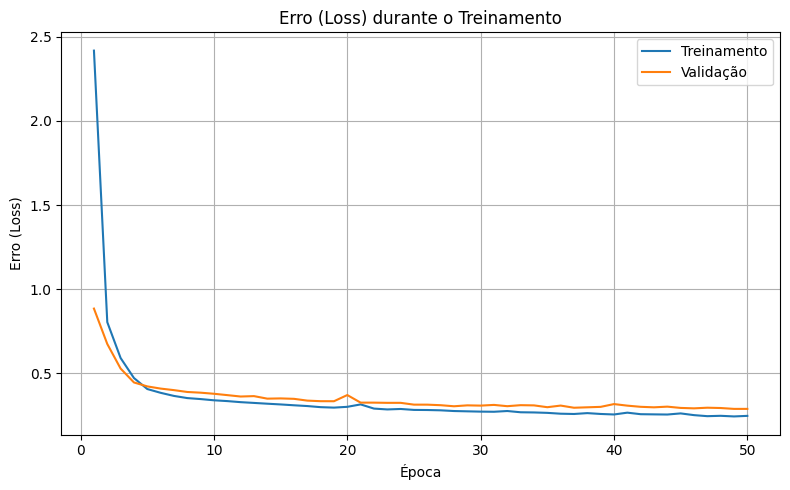

In [ ]:
# Plotando
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(8,5))

plt.plot(epochs, history.history['loss'], label='Treinamento')
plt.plot(epochs, history.history['val_loss'], label='Validação')
plt.title('Erro (Loss) durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Erro (Loss)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Fazemos então as previsões para o conjunto teste.

In [ ]:
# Faz as previsões para o teste
nn_pred = nn_model.predict(X_test_scaled).flatten()

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Por último, obtemos a métrica de desempenho na tarefa.

In [ ]:
mse_nn = mean_squared_error(y_test, nn_pred)

print(f"MSE Rede Neural: {mse_nn:.4f}")

MSE Rede Neural: 0.2715


Podemos criar um gráfico para comparar o desempenho dos diferentes modelos.

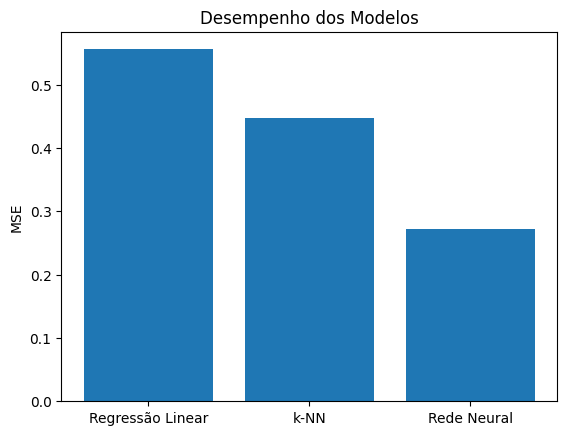

In [ ]:
# Nomes dos modelos e valores de RMSE
modelos = ['Regressão Linear', 'k-NN', 'Rede Neural']
mse_valores = [mse_lr, mse_knn, mse_nn]

# Criar gráfico
plt.bar(modelos, mse_valores)
plt.ylabel('MSE')
plt.title('Desempenho dos Modelos')
plt.show()

Agora, tente modificar a estrutura da rede neural para obter um erro menor.

**Importante:** Se rodarem o mesmo modelo novamente, os resultados serão distintos. Isso acontece porque existem fontes de aleatoriedade no processo de treinamento, como a inicialização dos pesos da rede e a ordem dos dados apresentada em cada época (`shuffle`). Esses fatores fazem com que o modelo siga trajetórias diferentes durante a otimização.

## Exercício: Classificação de Tipos de Vegetação com Três Modelos

Você foi contratado para auxiliar na construção de um sistema de classificação automática de cobertura vegetal com base em dados geográficos e ambientais. Esses dados são derivados de medições reais em áreas florestais nos Estados Unidos e foram coletados com o objetivo de prever o tipo de vegetação (ex: pinheiro, álamos, etc.) presente em determinada região.

Neste exercício, você deverá aplicar e comparar três algoritmos de classificação supervisionada:

* Regressão Logística

* Árvore de Decisão

* Rede Neural Densa

### Dataset: Forest Covertype
O dataset está disponível no Kaggle: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset

Dê uma olhada no dataset para entender a natureza dos dados.


### Tarefas
1. Importe os dados.

2. Transforme as classes de 1–7 para 0–6 (como esperado pelo Keras).

3. Verifique a distribuição entre as classes.

4. Separe os dados em entrada X e saída y.

5. Divida o dataset em treino e teste (ex: 90% treino, 10% teste).

6. Faça a normalização dos dados com StandardScaler.

7. Aplique os três modelos:

  * Regressão Logística (`LogisticRegression`)

  * KNN (`DecisionTreeClassifier`)

  * Rede Neural Densa

8. Meça o desempenho de cada modelo com acurácia e f1-score.

9. Compare os resultados em um gráfico de barras mostrando os resultados.

### Observações
* A tarefa é de classificação multiclasse (7 tipos de vegetação). A saída do modelo será, portanto, um número de 0 a 6.

* Para a rede neural, use:

  * 7 neurônios na camada de saída

  * função de ativação softmax (`softmax`)

* Na compilação da rede, use:

  * função de perda: categorical crossentropy (`sparse_categorical_crossentropy`)

  * métrica para acompanhar o treinamento do modelo: acurácia (`accuracy`)

* Para avaliar os resultados, após fazer a inferência para os dados de teste, é preciso encontrar a classe prevista: `np.argmax(predictions, axis=1)`.

#### 1. Importe os dados

In [ ]:
# 2. Carregar o dataset
df = pd.read_csv("covtype.csv")

print(f'Dimensionalidade do dataset: {df.shape}')
df.head()

Dimensionalidade do dataset: (581012, 55)


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

#### 2. Transforme as classes de 1–7 para 0–6 (como esperado pelo Keras).


In [ ]:
df['Cover_Type'] = df['Cover_Type'] - 1  # transformando as classes de 1–7 para 0–6

#### 3. Verifique a distribuição entre as classes.

In [ ]:
df['Cover_Type'].value_counts()

Cover_Type
1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: count, dtype: int64

#### 3. Separe os dados em entrada X e saída y

In [ ]:
# Separar entradas (X) e saídas (y)
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

#### 4. Divida o dataset em treino e teste (ex: 90% treino, 10% teste)

In [ ]:
# 4Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

#### 5. Faça a normalização dos dados com StandardScaler

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 6. Aplique os três modelos: Regressão Logística, Árvore de Decisão, Rede Neural

In [ ]:
# Regressão logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [ ]:
# Árvore de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

In [ ]:
# Rede neural
# Definir arquitetura da rede
nn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(62, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes
])

# Compilar modelo
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Treinar modelo e armazenar o histórico
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=1024,
    verbose=1,
    validation_split=0.1
)

Epoch 1/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.6817 - loss: 0.7707 - val_accuracy: 0.7979 - val_loss: 0.4724
Epoch 2/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8088 - loss: 0.4494 - val_accuracy: 0.8389 - val_loss: 0.3860
Epoch 3/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8430 - loss: 0.3753 - val_accuracy: 0.8563 - val_loss: 0.3448
Epoch 4/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.8652 - loss: 0.3264 - val_accuracy: 0.8732 - val_loss: 0.3101
Epoch 5/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8779 - loss: 0.2963 - val_accuracy: 0.8839 - val_loss: 0.2840
Epoch 6/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.8898 - loss: 0.2705 - val_accuracy: 0.8935 - val_loss: 0.2590
Epoch 7/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.8981 - loss: 0.2511 - val_accuracy: 0.8930 - val_loss: 0.2577
Epoch 8/50
460/460 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9018 - loss: 0.2403 - 

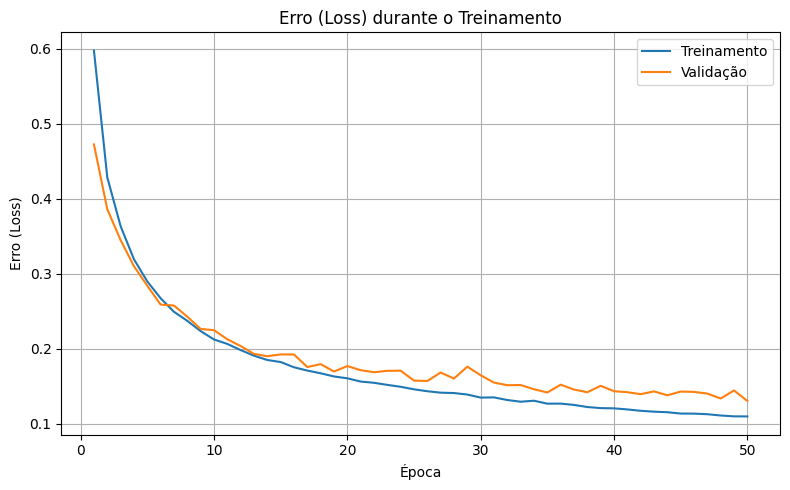

In [ ]:
# Plotando o aprendizado do modelo
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(8,5))

plt.plot(epochs, history.history['loss'], label='Treinamento')
plt.plot(epochs, history.history['val_loss'], label='Validação')
plt.title('Erro (Loss) durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Erro (Loss)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Avaliar
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)

1816/1816 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


#### 7. Meça o desempenho de cada modelo usando acurácia como métrica principal

In [ ]:
# Regressão logística
acc_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log, average='macro')
print(f"Acurácia Regressão Logística: {acc_log:.4f}")
print(f"F1-score Regressão Logística: {f1_log:.4f}")

# Árvore de Decisão
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='macro')
print(f"Acurácia Árvore de Decisão: {acc_tree:.4f}")
print(f"F1-score Árvore de Decisão: {f1_tree:.4f}")

# Rede Neural
acc_nn = accuracy_score(y_test, y_pred_nn_classes)
f1_nn = f1_score(y_test, y_pred_nn_classes, average='macro')
print(f"Acurácia Rede Neural: {acc_nn:.4f}")
print(f"F1-score Rede Neural: {f1_nn:.4f}")

Acurácia Regressão Logística: 0.7218
F1-score Regressão Logística: 0.5292
Acurácia Árvore de Decisão: 0.9411
F1-score Árvore de Decisão: 0.9031
Acurácia Rede Neural: 0.9486
F1-score Rede Neural: 0.9112


#### 8. Compare os resultados em um gráfico de barras mostrando as acurácias

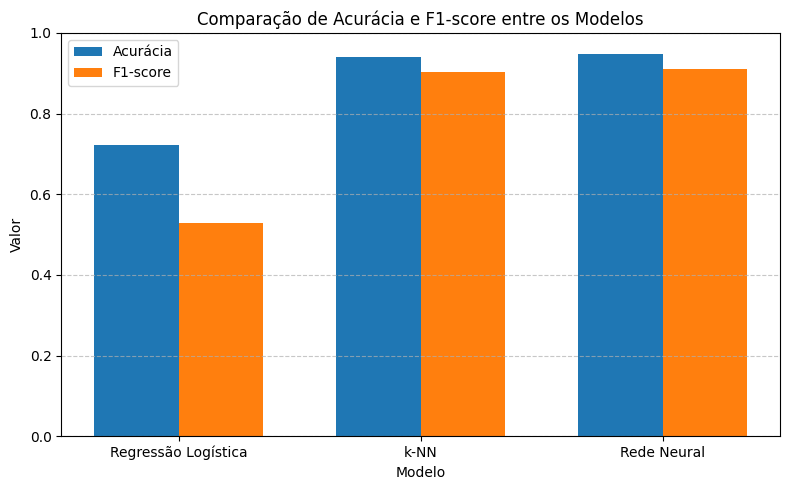

In [ ]:
# Plotar acurácias dos modelos
modelos = ['Regressão Logística', 'k-NN', 'Rede Neural']
acuracia = [acc_log, acc_tree, acc_nn]
f1_metrics = [f1_log, f1_tree, f1_nn]

# Plotando
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
index = range(len(modelos))

# Barras para Acurácia
plt.bar(index, acuracia, width=bar_width, label='Acurácia')

# Barras para F1-score
plt.bar([i + bar_width for i in index], f1_metrics, width=bar_width, label='F1-score')

# Configurações do gráfico
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.title('Comparação de Acurácia e F1-score entre os Modelos')
plt.xticks([i + bar_width / 2 for i in index], modelos)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()